## Notebook to fix the occurance of NaN values in the forcing files

In [2]:
import xarray as xr

### Import data

In [4]:
path = f'/home/ikeizer/NorthSea4'

init_in = xr.open_dataset(f'{path}/NorthSea4_init_SODA_1980116_to_20201216.nc')
clim_in = xr.open_dataset(f'{path}/NorthSea4_clim_SODA_1980116_to_20201216.nc')
bry_in = xr.open_dataset(f'{path}/NorthSea4_bry_SODA_1980116_to_20201216.nc')
grid = xr.open_dataset(f'{path}/NorthSea4_smooth01_sponge_nudg.nc')

In [37]:
def fix_nan(result):
    result['u'] = result.u.where(grid.mask_u == 1, -9.99e33)
    result['v'] = result.v.where(grid.mask_v == 1, -9.99e33)

    result['salt'] = result.salt.where(grid.mask_rho == 1, -9.99e33)
    result['temp'] = result.temp.where(grid.mask_rho == 1, -9.99e33)
    result['zeta'] = result.zeta.where(grid.mask_rho == 1, -9.99e33)

    result['ubar'] = result.ubar.where(grid.mask_u == 1, -9.99e33)
    result['vbar'] = result.vbar.where(grid.mask_v == 1, -9.99e33)
    
    # Add attrs
    result.u.attrs['_FillValue'] = -9.99e33
    result.v.attrs['_FillValue'] = -9.99e33
    
    result.salt.attrs['_FillValue'] = -9.99e33
    result.temp.attrs['_FillValue'] = -9.99e33
    result.zeta.attrs['_FillValue'] = -9.99e33
    
    result.ubar.attrs['_FillValue'] = -9.99e33
    result.vbar.attrs['_FillValue'] = -9.99e33
    
    

    return result


def fix_nan_bry(result):
    result['u_west'] = result.u_west.where(grid.mask_u.isel(xi_u = 0) == 1, -9.99e33)
    result['u_east'] = result.u_east.where(grid.mask_u.isel(xi_u = -1) == 1, -9.99e33)
    result['u_north'] = result.u_north.where(grid.mask_u.isel(eta_u = -1) == 1, -9.99e33)
    result['u_south'] = result.u_south.where(grid.mask_u.isel(eta_u = 0) == 1, -9.99e33)
    
    result['v_west'] = result.v_west.where(grid.mask_v.isel(xi_v = 0) == 1, -9.99e33)
    result['v_east'] = result.v_east.where(grid.mask_v.isel(xi_v = -1) == 1, -9.99e33)
    result['v_north'] = result.v_north.where(grid.mask_v.isel(eta_v = -1) == 1, -9.99e33)
    result['v_south'] = result.v_south.where(grid.mask_v.isel(eta_v = 0) == 1, -9.99e33)

    result['salt_west'] = result.salt_west.where(grid.mask_rho.isel(xi_rho = 0) == 1, -9.99e33)
    result['salt_east'] = result.salt_east.where(grid.mask_rho.isel(xi_rho = -1) == 1, -9.99e33)
    result['salt_north'] = result.salt_north.where(grid.mask_rho.isel(eta_rho = -1) == 1, -9.99e33)
    result['salt_south'] = result.salt_south.where(grid.mask_rho.isel(eta_rho = 0) == 1, -9.99e33)
    
    result['temp_west'] = result.temp_west.where(grid.mask_rho.isel(xi_rho = 0) == 1, -9.99e33)
    result['temp_east'] = result.temp_east.where(grid.mask_rho.isel(xi_rho = -1) == 1, -9.99e33)
    result['temp_north'] = result.temp_north.where(grid.mask_rho.isel(eta_rho = -1) == 1, -9.99e33)
    result['temp_south'] = result.temp_south.where(grid.mask_rho.isel(eta_rho = 0) == 1, -9.99e33)
    
    result['zeta_west'] = result.zeta_west.where(grid.mask_rho.isel(xi_rho = 0) == 1, -9.99e33)
    result['zeta_east'] = result.zeta_east.where(grid.mask_rho.isel(xi_rho = -1) == 1, -9.99e33)
    result['zeta_north'] = result.zeta_north.where(grid.mask_rho.isel(eta_rho = -1) == 1, -9.99e33)
    result['zeta_south'] = result.zeta_south.where(grid.mask_rho.isel(eta_rho = 0) == 1, -9.99e33)
    
    result['ubar_west'] = result.ubar_west.where(grid.mask_u.isel(xi_u = 0) == 1, -9.99e33)
    result['ubar_east'] = result.ubar_east.where(grid.mask_u.isel(xi_u = -1) == 1, -9.99e33)
    result['ubar_north'] = result.ubar_north.where(grid.mask_u.isel(eta_u = -1) == 1, -9.99e33)
    result['ubar_south'] = result.ubar_south.where(grid.mask_u.isel(eta_u = 0) == 1, -9.99e33)
    
    result['vbar_west'] = result.vbar_west.where(grid.mask_v.isel(xi_v = 0) == 1, -9.99e33)
    result['vbar_east'] = result.vbar_east.where(grid.mask_v.isel(xi_v = -1) == 1, -9.99e33)
    result['vbar_north'] = result.vbar_north.where(grid.mask_v.isel(eta_v = -1) == 1, -9.99e33)
    result['vbar_south'] = result.vbar_south.where(grid.mask_v.isel(eta_v = 0) == 1, -9.99e33)
    
    
    result.salt_west.attrs['_FillValue'] = -9.99e33
    result.salt_east.attrs['_FillValue'] = -9.99e33
    result.salt_south.attrs['_FillValue'] = -9.99e33
    result.salt_north.attrs['_FillValue'] = -9.99e33
    
    result.temp_west.attrs['_FillValue'] = -9.99e33
    result.temp_east.attrs['_FillValue'] = -9.99e33
    result.temp_south.attrs['_FillValue'] = -9.99e33
    result.temp_north.attrs['_FillValue'] = -9.99e33
    
    result.zeta_west.attrs['_FillValue'] = -9.99e33
    result.zeta_east.attrs['_FillValue'] = -9.99e33
    result.zeta_south.attrs['_FillValue'] = -9.99e33
    result.zeta_north.attrs['_FillValue'] = -9.99e33
    
    result.u_west.attrs['_FillValue'] = -9.99e33
    result.u_east.attrs['_FillValue'] = -9.99e33
    result.u_south.attrs['_FillValue'] = -9.99e33
    result.u_north.attrs['_FillValue'] = -9.99e33
    result.ubar_west.attrs['_FillValue'] = -9.99e33
    result.ubar_east.attrs['_FillValue'] = -9.99e33
    result.ubar_south.attrs['_FillValue'] = -9.99e33
    result.ubar_north.attrs['_FillValue'] = -9.99e33
    
    result.v_west.attrs['_FillValue'] = -9.99e33
    result.v_east.attrs['_FillValue'] = -9.99e33
    result.v_south.attrs['_FillValue'] = -9.99e33
    result.v_north.attrs['_FillValue'] = -9.99e33
    result.vbar_west.attrs['_FillValue'] = -9.99e33
    result.vbar_east.attrs['_FillValue'] = -9.99e33
    result.vbar_south.attrs['_FillValue'] = -9.99e33
    result.vbar_north.attrs['_FillValue'] = -9.99e33
    
    return result

In [38]:
init = fix_nan(init_in)
clim = fix_nan(clim_in)
bry = fix_nan_bry(bry_in)

### Save data

In [39]:
init.to_netcdf(f'{path}/NorthSea4_init_nan_SODA_1980116_to_20201216.nc')
clim.to_netcdf(f'{path}/NorthSea4_clim_nan_SODA_1980116_to_20201216.nc')
bry.to_netcdf(f'{path}/NorthSea4_bry_nan_SODA_1980116_to_20201216.nc')

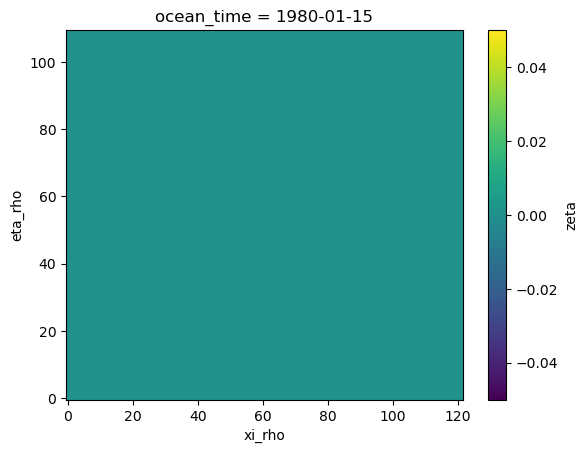

In [43]:
init.zeta.isnull().plot()

In [58]:
his = xr.open_dataset('/projects/0/einf2878/output/run5/NorthSea4_his.nc')

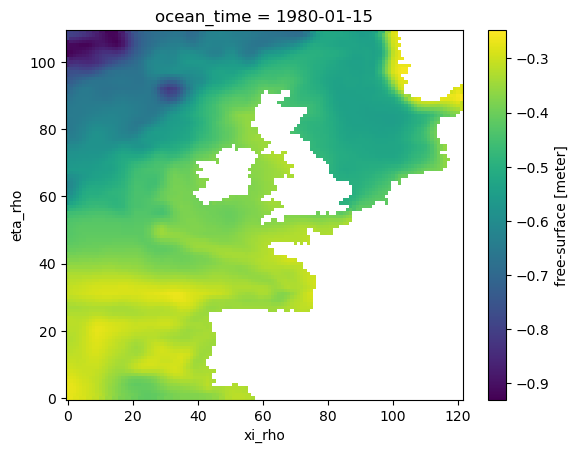

In [60]:
his.zeta.plot()

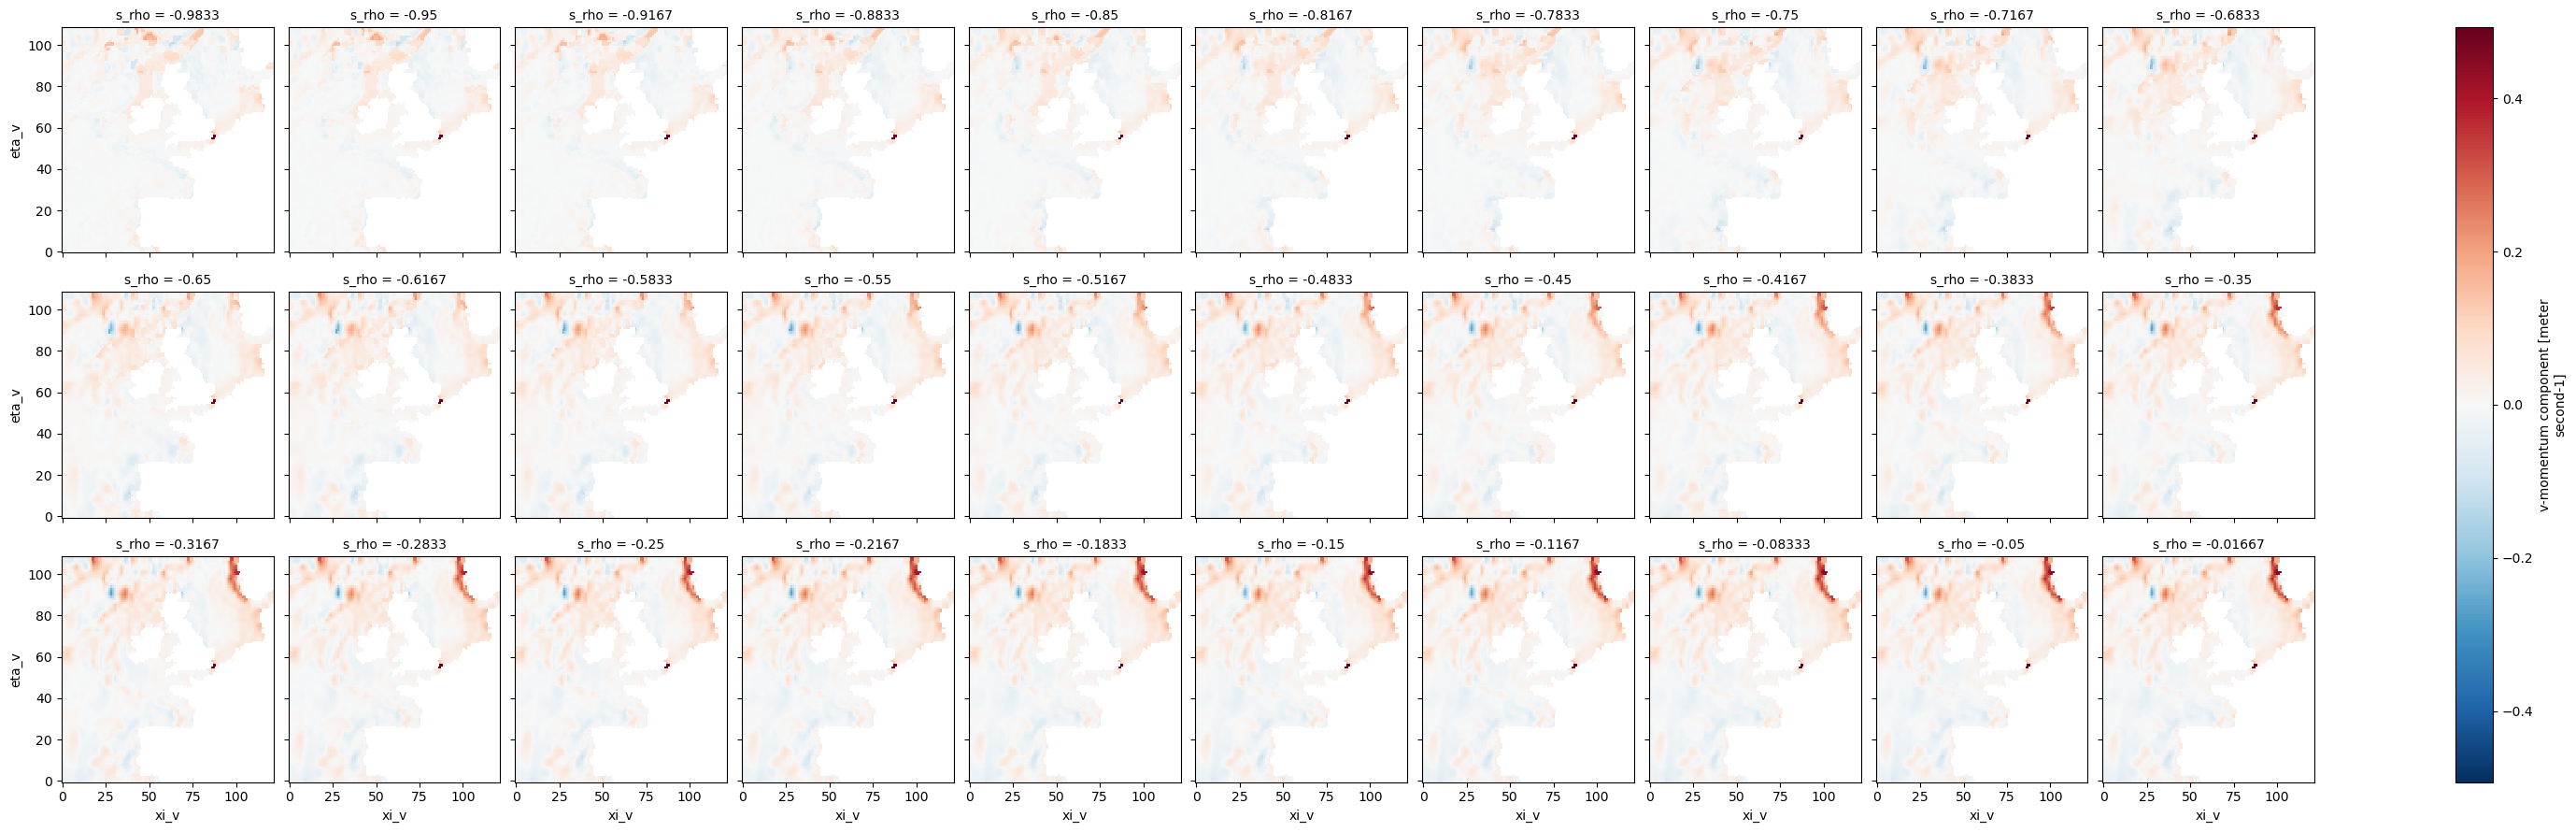

In [61]:
his.v.plot(col = 's_rho', col_wrap = 10)

In [5]:
init = xr.open_dataset(f'{path}/NorthSea4_init_nan_SODA_1980116_to_20201216.nc')
clim = xr.open_dataset(f'{path}/NorthSea4_clim_nan_SODA_1980116_to_20201216.nc')
bry = xr.open_dataset(f'{path}/NorthSea4_bry_nan_SODA_1980116_to_20201216.nc')

In [8]:
init_ora = xr.open_dataset(f'{path}/NorthSea4_init_ORA20C_1950116_to_20091216.nc')

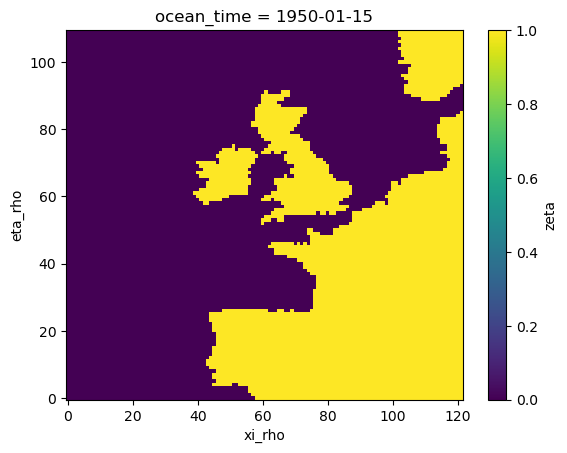

In [9]:
init_ora.zeta.isnull().plot()

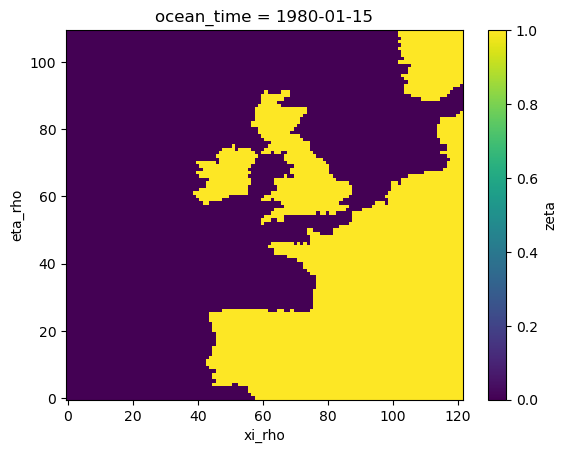

In [7]:
init.zeta.isnull().plot()